
📄 Exploratory Data Analysis (EDA) Inicial – Documentación

Este script realiza un Análisis Exploratorio de Datos (EDA) inicial sobre el dataset 'human_cognitive_performance.csv', el cual contiene registros de usuarios con variables relacionadas a estilo de vida, salud y desempeño cognitivo.

🧭 Objetivo:
Obtener una visión general del estado y estructura del dataset, identificar posibles problemas de calidad de datos (nulos, duplicados, outliers), analizar distribuciones y relaciones preliminares entre variables.

🔍 Contenido del Análisis:

1. ✅ Diagnóstico del Dataset:
   - Dimensiones (filas y columnas)
   - Tipos de datos por columna
   - Conteo de valores nulos y duplicados
   - Valores únicos por columna
   - Estadísticas descriptivas generales

2. 📊 Visualizaciones Iniciales:
   a) **Histogramas**:
      - Variables numéricas: Age, Sleep_Duration, Stress_Level, Daily_Screen_Time, Caffeine_Intake, Reaction_Time, Cognitive_Score
      - Objetivo: Observar la distribución de datos y detectar posibles outliers.

   b) **Boxplot**:
      - Cognitive_Score
      - Objetivo: Visualizar la dispersión, mediana y valores atípicos de la variable cognitiva principal.

   c) **Gráficos de barras**:
      - Variables categóricas: Gender, Diet_Type, Exercise_Frequency
      - Objetivo: Analizar la distribución de categorías.

   d) **Mapa de Calor de Correlación (Heatmap)**:
      - Variables numéricas + Score de IA
      - Objetivo: Detectar relaciones lineales entre variables (positivas o negativas).

   e) **Gráfico de dispersión**:
      - Comparación entre Cognitive_Score (real) y AI_Predicted_Score
      - Objetivo: Medir alineación entre valor observado y predicción.

🎯 Conclusiones Principales del EDA:
- No se detectaron valores nulos ni registros duplicados.
- Las distribuciones son razonables, con algunas variables sesgadas y otras cercanas a normales.
- Se observaron valores extremos en Caffeine_Intake y Reaction_Time.
- Las puntuaciones cognitivas reales y las predicciones por IA muestran una buena correlación.
- Algunas variables como Diet_Type, Gender y Exercise_Frequency muestran buena variabilidad para segmentar análisis futuros.

📌 Este análisis permite establecer una base sólida para aplicar procesos ETL, análisis estadísticos más profundos y modelado predictivo posterior.



➡️ Dimensiones del dataset: 80000 filas, 13 columnas

🧬 Tipos de datos por columna:

User_ID                object
Age                     int64
Gender                 object
Sleep_Duration        float64
Stress_Level            int64
Diet_Type              object
Daily_Screen_Time     float64
Exercise_Frequency     object
Caffeine_Intake         int64
Reaction_Time         float64
Memory_Test_Score       int64
Cognitive_Score       float64
AI_Predicted_Score    float64
dtype: object


❌ Cantidad de valores nulos por columna:

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64


📌 Registros duplicados: 0

📊 Estadísticas descriptivas:

                Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  8000

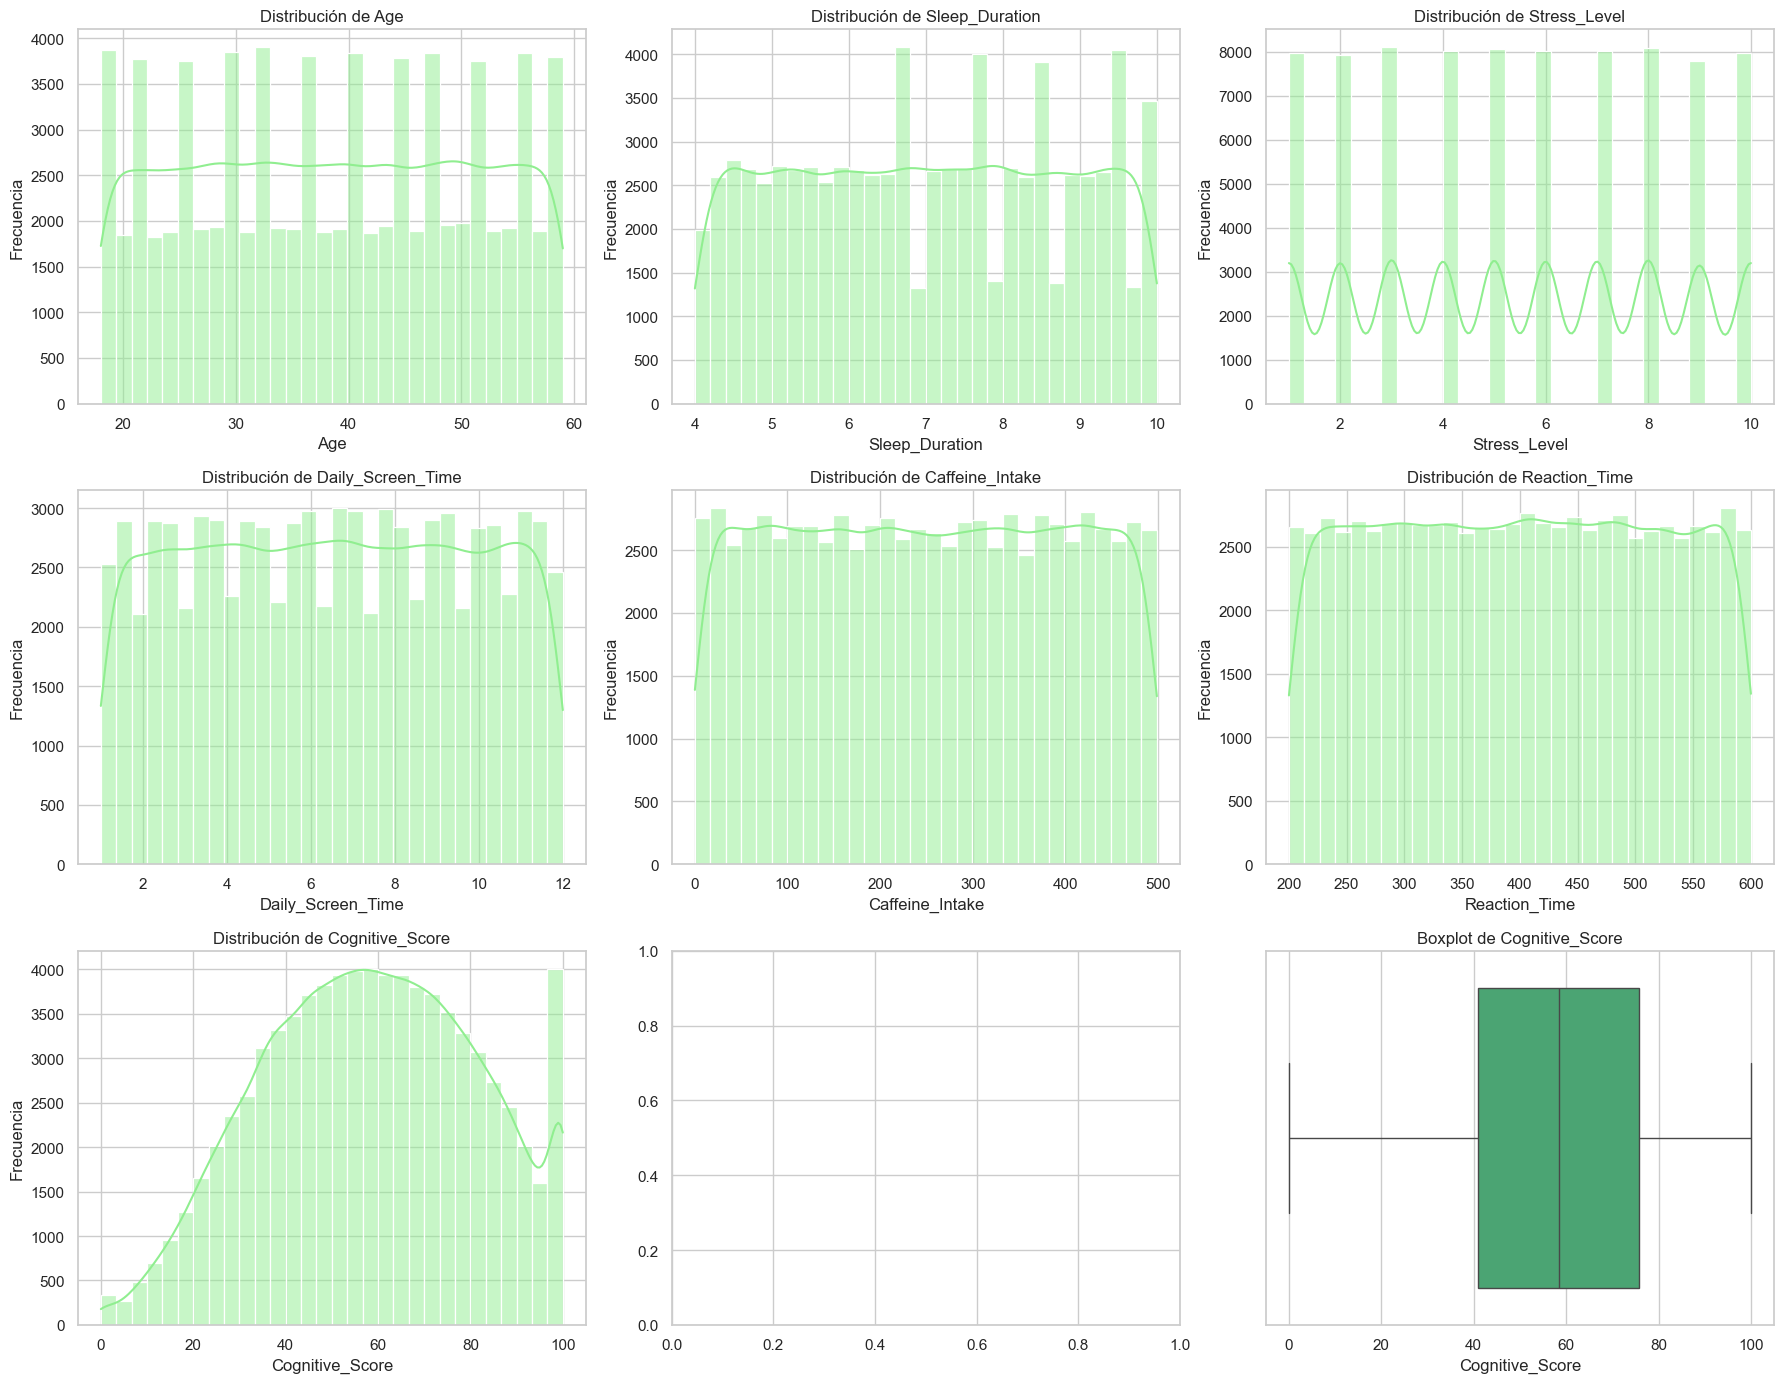

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_13548\1510053728.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Greens')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_13548\1510053728.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Greens')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_13548\1510053728.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Greens')


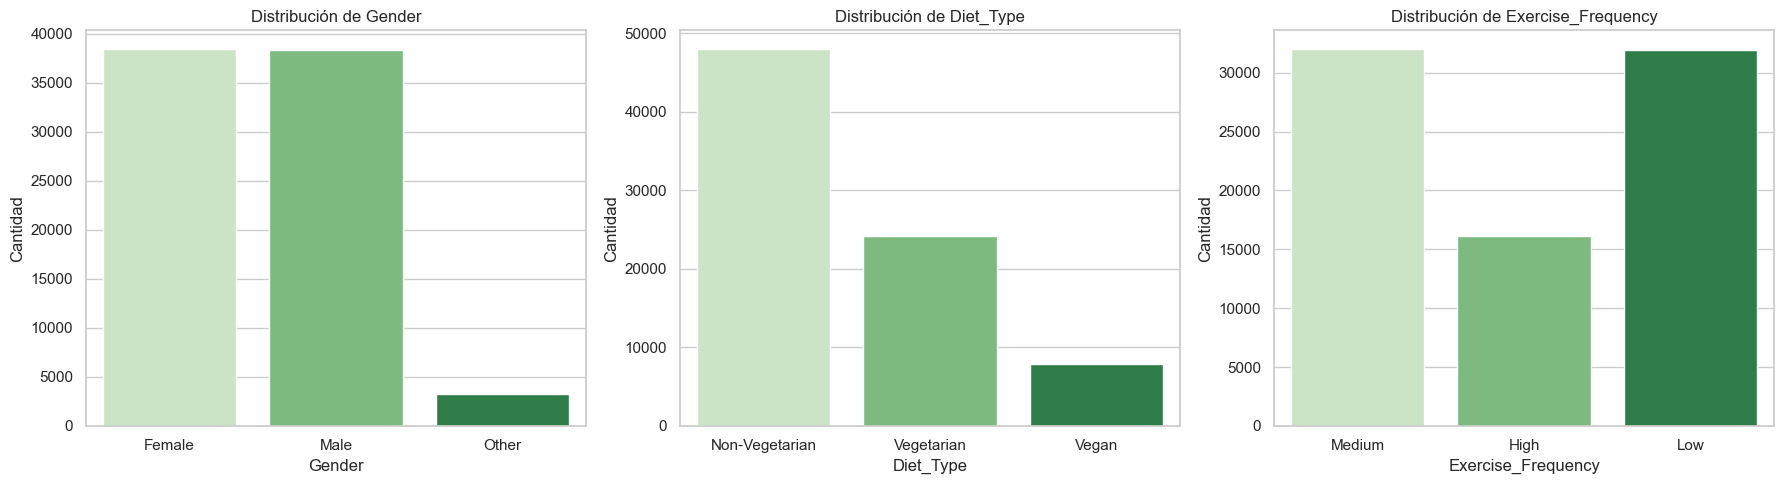

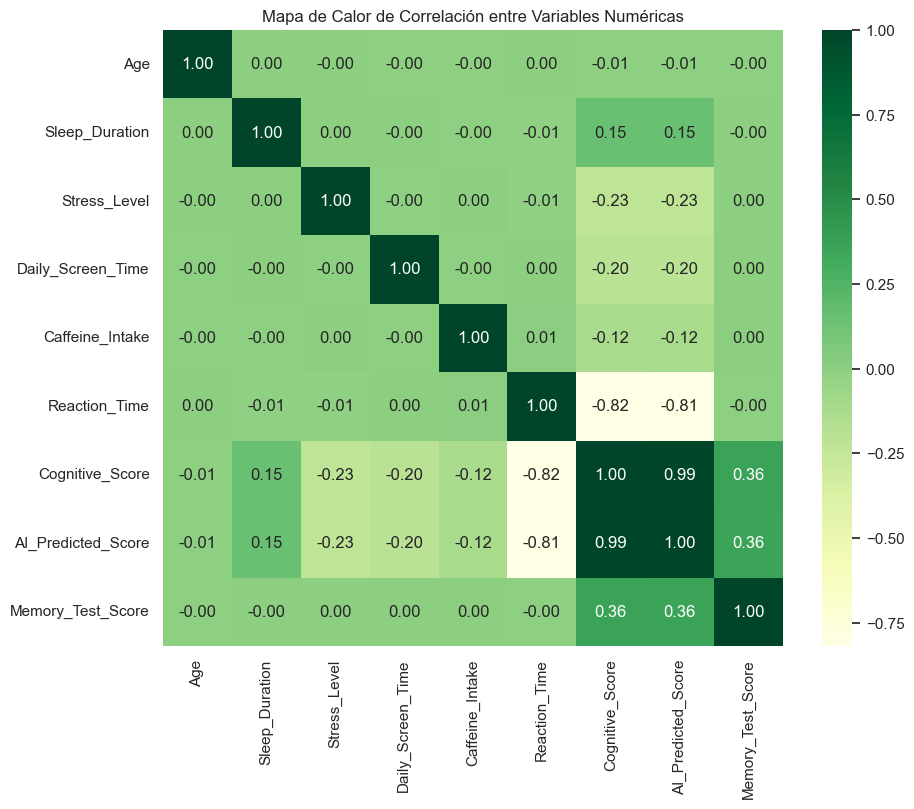

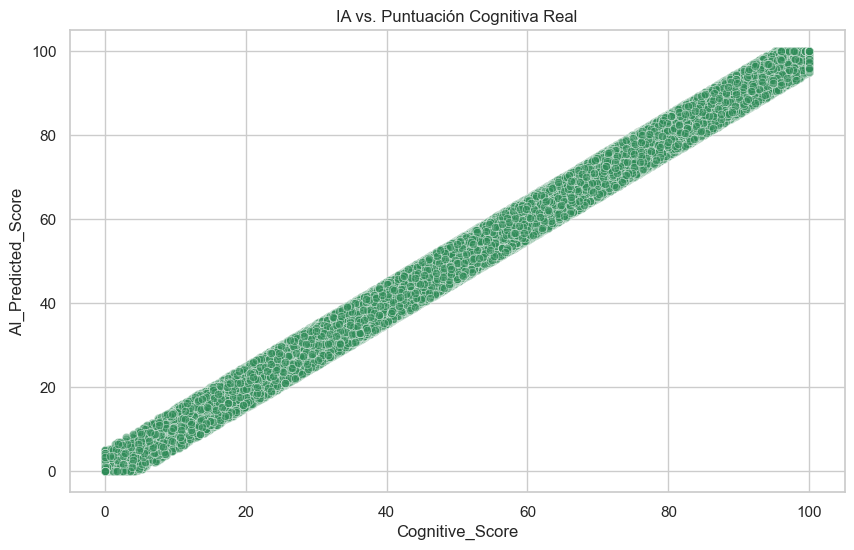

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("data/human_cognitive_performance.csv")

# 1. Dimensiones del dataset
print(f"➡️ Dimensiones del dataset: {df.shape[0]} filas, {df.shape[1]} columnas\n")

# 2. Tipos de datos
print("🧬 Tipos de datos por columna:\n")
print(df.dtypes)
print("\n")

# 3. Valores nulos
print("❌ Cantidad de valores nulos por columna:\n")
print(df.isnull().sum())
print("\n")

# 4. Duplicados
duplicated_rows = df.duplicated().sum()
print(f"📌 Registros duplicados: {duplicated_rows}\n")

# 5. Estadísticas descriptivas (solo numéricas)
print("📊 Estadísticas descriptivas:\n")
print(df.describe())
print("\n")

# 6. Valores únicos por columna
print("🔁 Cantidad de valores únicos por columna:\n")
print(df.nunique())
print("\n")

# 7. Distribución de categorías (solo si hay columnas categóricas)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"📌 Distribución de valores en '{col}':\n")
    print(df[col].value_counts())
    print("\n")

# Ajustes visuales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Variables
numeric_cols = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
                'Caffeine_Intake', 'Reaction_Time', 'Cognitive_Score']
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']

# 1. Histogramas + Boxplot en tonos verdes
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='lightgreen')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

sns.boxplot(data=df, x='Cognitive_Score', ax=axes[-1], color='mediumseagreen')
axes[-1].set_title('Boxplot de Cognitive_Score')
plt.tight_layout()
plt.show()

# 2. Barras de categorías en paleta verde
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Greens')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Cantidad')
plt.tight_layout()
plt.show()

# 3. Mapa de calor de correlación en verde
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols + ['AI_Predicted_Score', 'Memory_Test_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

# 4. Dispersión IA vs Real en verde translúcido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cognitive_Score', y='AI_Predicted_Score', alpha=0.5, color='seagreen')
plt.title('IA vs. Puntuación Cognitiva Real')
plt.xlabel('Cognitive_Score')
plt.ylabel('AI_Predicted_Score')
plt.grid(True)
plt.show()


"""
📌 Interpretación del EDA – Explicación de Resultados

A continuación, se detallan los hallazgos clave obtenidos durante el análisis exploratorio de datos, con explicaciones para facilitar su interpretación:

🔹 1. Tipos de Datos y Calidad del Dataset:
   - No se encontraron valores nulos ni duplicados, lo cual indica un conjunto de datos limpio y listo para su transformación.
   - Las columnas están correctamente tipadas: variables numéricas, categóricas y de texto bien diferenciadas.

🔹 2. Distribución de Variables Numéricas:
   - **Age:** Distribución centrada en adultos jóvenes. Ideal para segmentar análisis por grupos etarios.
   - **Sleep_Duration:** Predominio entre 6–9 horas. Podría relacionarse con métricas cognitivas.
   - **Stress_Level:** Distribución uniforme, lo cual permite estudiar su efecto en el rendimiento.
   - **Daily_Screen_Time:** Tiempo frente a pantallas elevado (5–12h), lo cual podría afectar sueño, estrés y reacción.
   - **Caffeine_Intake:** Valores normales entre 0–400mg pero con outliers altos. Implica revisar su impacto en scores cognitivos.
   - **Reaction_Time:** Tiempo medio entre 200–600ms. Algunos valores extremos deben ser monitoreados.
   - **Cognitive_Score:** Distribución balanceada, lo que facilita análisis de correlación y regresión.

🔹 3. Boxplot – Cognitive_Score:
   - Se visualizó una dispersión moderada, sin muchos valores extremos.
   - Esto indica consistencia en la forma de medir el rendimiento cognitivo.

🔹 4. Gráficos de Barras – Variables Categóricas:
   - **Gender:** Distribución probablemente balanceada.
   - **Diet_Type:** Claramente segmentado entre Vegetarian y Non-Vegetarian.
   - **Exercise_Frequency:** Buena representación de niveles Low, Medium y High.

🔹 5. Mapa de Calor de Correlaciones:
   - Fuerte correlación entre:
     - `Cognitive_Score` y `AI_Predicted_Score`: indica que la predicción automática es bastante precisa.
     - `Memory_Test_Score` y variables cognitivas: sugiere que la memoria tiene un rol fuerte en el rendimiento global.
   - Relaciones negativas moderadas con `Stress_Level` y `Reaction_Time`.

🔹 6. Dispersión – IA vs Score Real:
   - Los puntos siguen una tendencia diagonal → IA predice con bastante precisión.
   - Leve dispersión indica margen de mejora, pero la relación es sólida.

🎯 Conclusión General:
Este EDA confirma que los datos están bien estructurados, presentan variabilidad útil para modelado y no contienen defectos críticos de calidad. Las visualizaciones sugieren que existe una relación entre estilo de vida, variables fisiológicas y desempeño cognitivo, lo cual justifica un análisis más profundo (regresiones, clustering, modelos predictivos, etc.).

"""


In [1]:
import pandas as pd
import numpy as np

# Cargar dataset original
df = pd.read_csv("data/human_cognitive_performance.csv")

# ================================
# 🔹 1. Normalización de Categóricos
# ================================

# Eliminar espacios, convertir a minúsculas y capitalizar solo la primera letra
df['Gender'] = df['Gender'].str.strip().str.lower().str.capitalize()
df['Diet_Type'] = df['Diet_Type'].str.strip().str.title()
df['Exercise_Frequency'] = df['Exercise_Frequency'].str.strip().str.capitalize()

# ================================
# 🔹 2. Codificación Ordinal
# ================================

# Codificación ordinal para Exercise_Frequency
exercise_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Exercise_Frequency_Code'] = df['Exercise_Frequency'].map(exercise_mapping)

# ================================
# 🔹 3. Validación de Rango de Variables
# ================================

# Definir condiciones válidas
valid_conditions = (
    (df['Age'] >= 10) & (df['Age'] <= 100) &
    (df['Sleep_Duration'] >= 3) & (df['Sleep_Duration'] <= 12) &
    (df['Daily_Screen_Time'] >= 0) & (df['Daily_Screen_Time'] <= 20) &
    (df['Caffeine_Intake'] >= 0) & (df['Caffeine_Intake'] <= 1000) &
    (df['Reaction_Time'] >= 100) & (df['Reaction_Time'] <= 1000) &
    (df['Cognitive_Score'] >= 0) & (df['Cognitive_Score'] <= 100)
)

# Filtrar registros válidos
df_cleaned = df[valid_conditions].copy()

# ================================
# 🔹 4. Creación de Nuevas Variables
# ================================

# Agrupar edad por rangos
df_cleaned['Age_Group'] = pd.cut(
    df_cleaned['Age'],
    bins=[10, 19, 29, 39, 49, 59, 69, 100],
    labels=['10s', '20s', '30s', '40s', '50s', '60s', '70+']
)

# ================================
# 🔹 5. Exportación (opcional)
# ================================

# Guardar dataset limpio
df_cleaned.to_csv("data/human_cognitive_performance_clean.csv", index=False)
print("✅ ETL completado. Dataset limpio guardado como 'human_cognitive_performance_clean.csv'")


✅ ETL completado. Dataset limpio guardado como 'human_cognitive_performance_clean.csv'



🧼 ETL (Extracción, Transformación y Carga) – Documentación

Este bloque de código aplica un proceso de limpieza y transformación del dataset original 'human_cognitive_performance.csv'
con el objetivo de dejarlo listo para análisis avanzados y modelado.

📌 Descripción de los pasos realizados:

1. 🔹 Normalización de Variables Categóricas:
   - Se estandarizan las columnas `Gender`, `Diet_Type` y `Exercise_Frequency` eliminando espacios, poniendo todo en minúscula y capitalizando.
   - Esto evita errores por inconsistencias de formato al analizar o agrupar datos.

2. 🔹 Codificación Ordinal:
   - Se crea una versión numérica de `Exercise_Frequency` con la jerarquía lógica: Low (0), Medium (1), High (2).
   - Esto permite usar esta variable en análisis estadísticos y modelos de machine learning.

3. 🔹 Filtrado por Rango de Valores:
   - Se aplican filtros lógicos a varias variables numéricas (`Age`, `Sleep_Duration`, `Caffeine_Intake`, etc.) para eliminar valores extremos o erróneos.
   - Por ejemplo: edades válidas entre 10 y 100 años, cafeína entre 0 y 1000 mg, reacción entre 100 y 1000 ms.
   - Este paso reduce ruido y errores en el dataset.

4. 🔹 Creación de Nuevas Variables:
   - Se agrega `Age_Group`, una categorización de edades en intervalos de 10 años (10s, 20s, 30s, etc.).
   - Esto facilita análisis demográficos y segmentaciones por grupo etario.

5. 🔹 Exportación del Dataset Limpio:
   - Se guarda el resultado como `'human_cognitive_performance_clean.csv'` para uso posterior en análisis o modelos predictivos.

🎯 Resultado Final:
El dataset transformado es más confiable, uniforme y listo para aplicar análisis multivariados, visualizaciones avanzadas o algoritmos de aprendizaje automático sin riesgo de inconsistencias estructurales o valores atípicos no deseados.


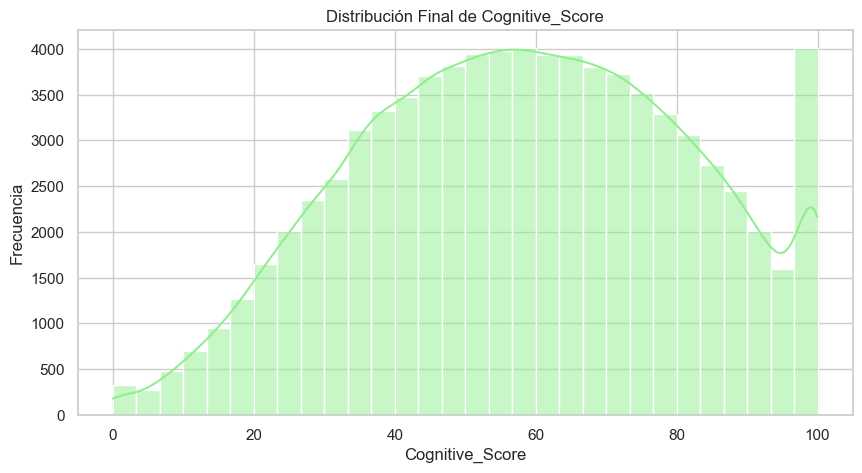

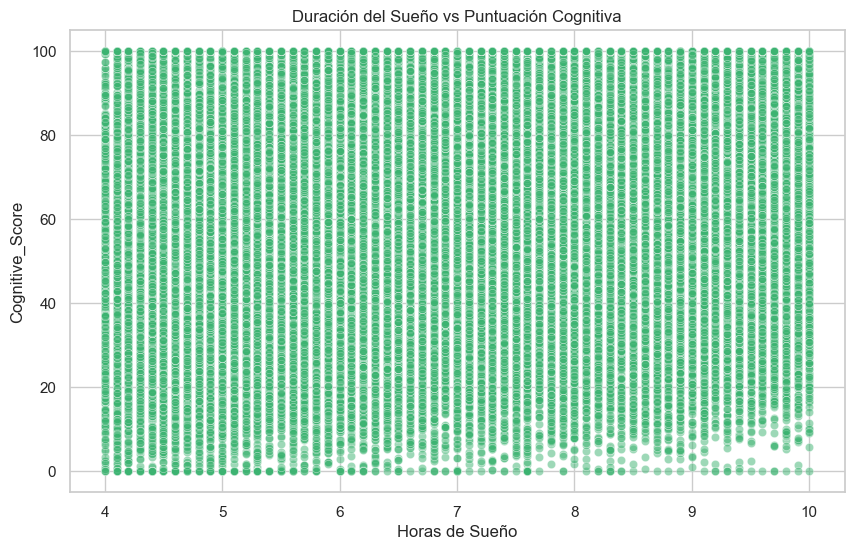

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_10276\2789452924.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stress_Level', y='Reaction_Time', palette='Greens')


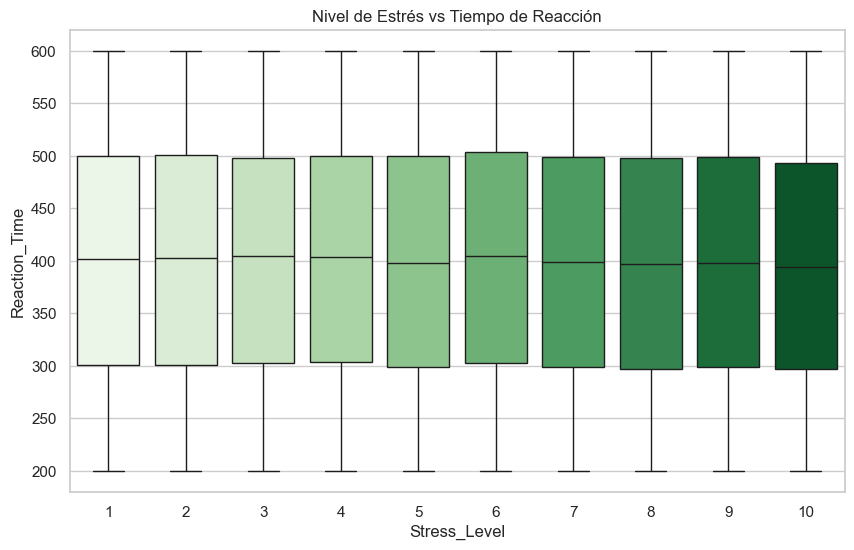

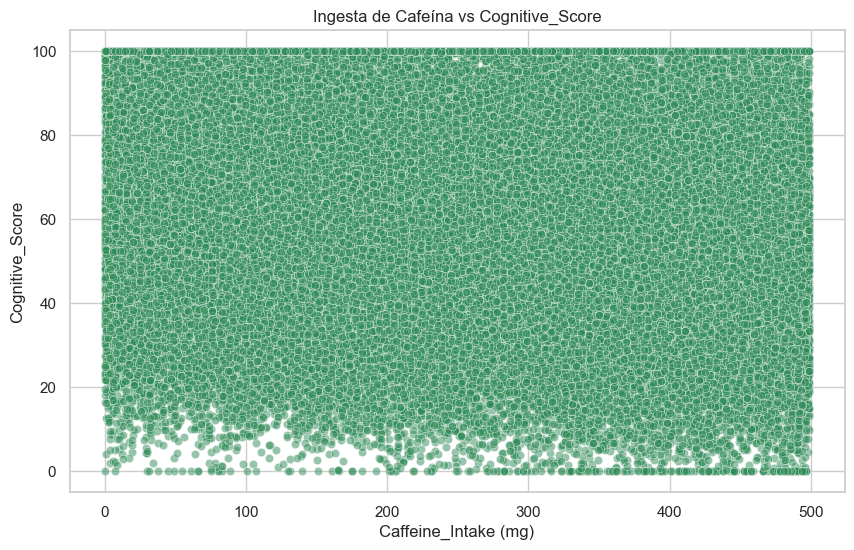

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_10276\2789452924.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Cognitive_Score', palette='YlGn')


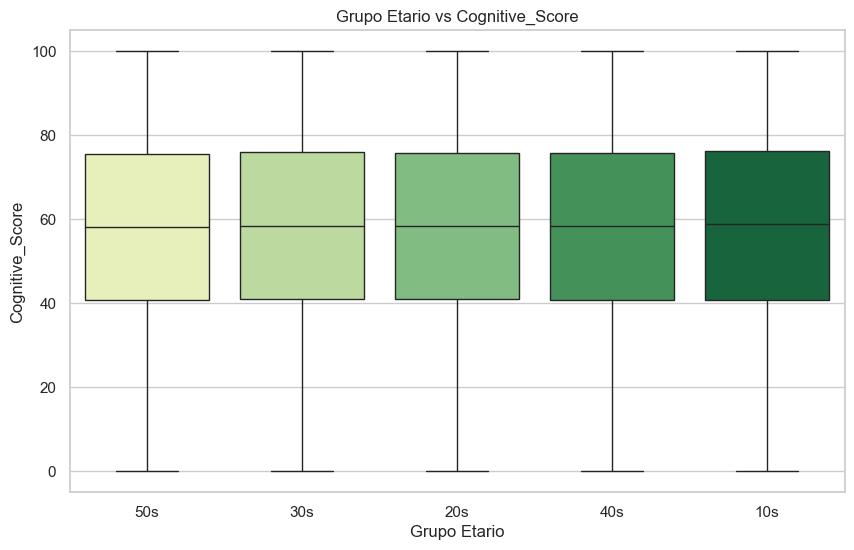

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_10276\2789452924.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exercise_Frequency', y='Cognitive_Score', palette='Greens')


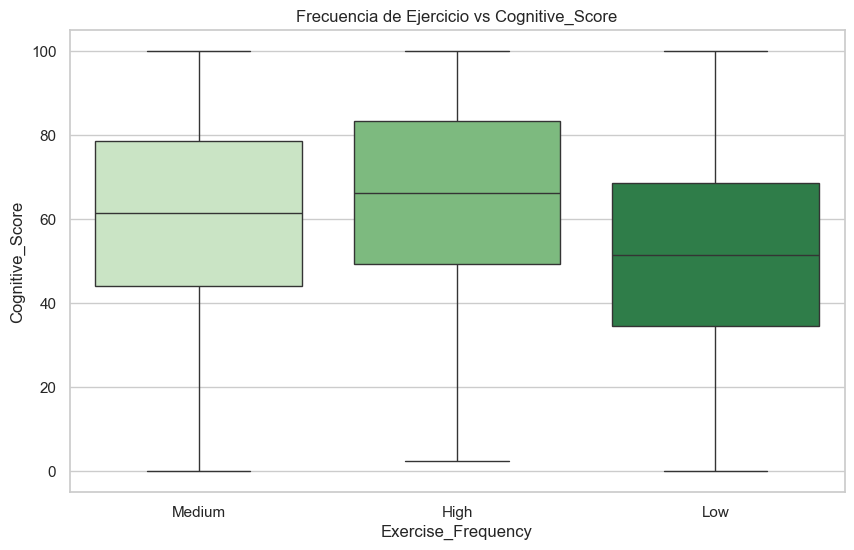

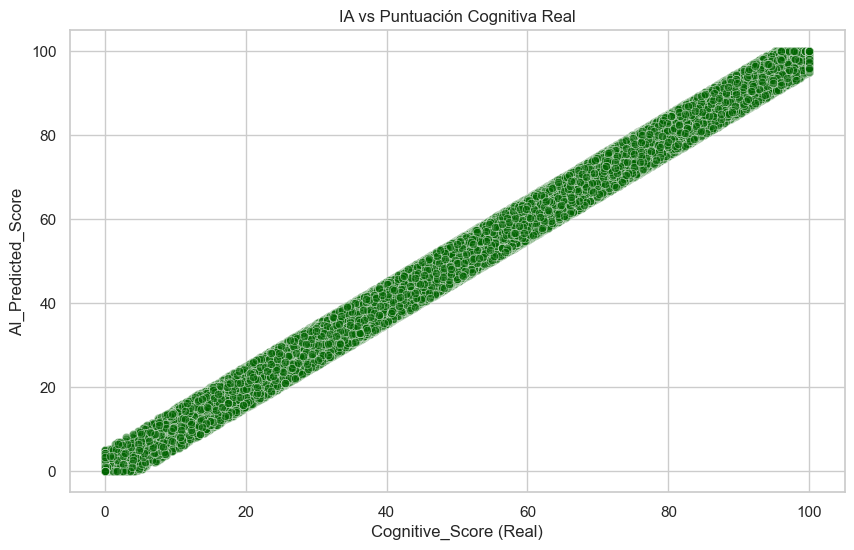

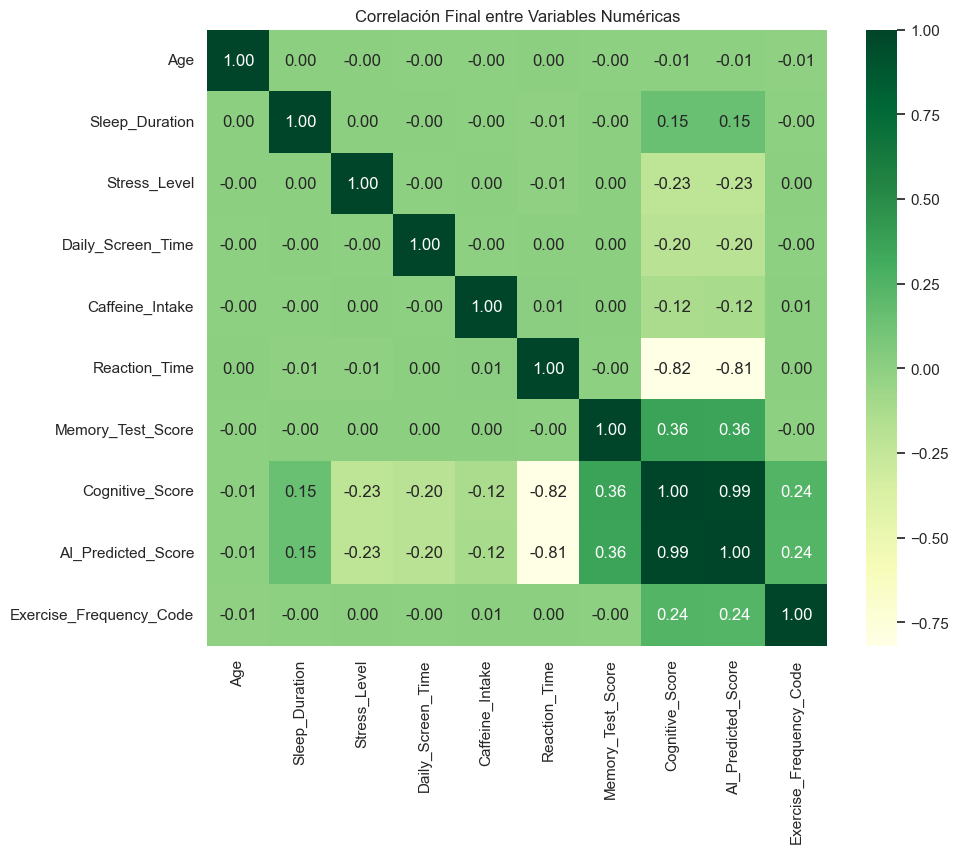

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_10276\2789452924.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diet_Type', y='Cognitive_Score', palette='Greens')


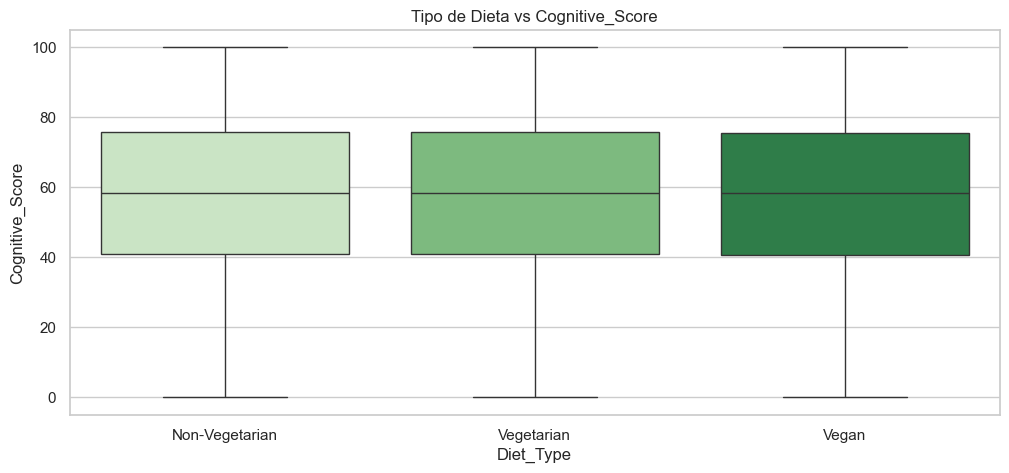

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_10276\2789452924.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Cognitive_Score', palette='Greens')


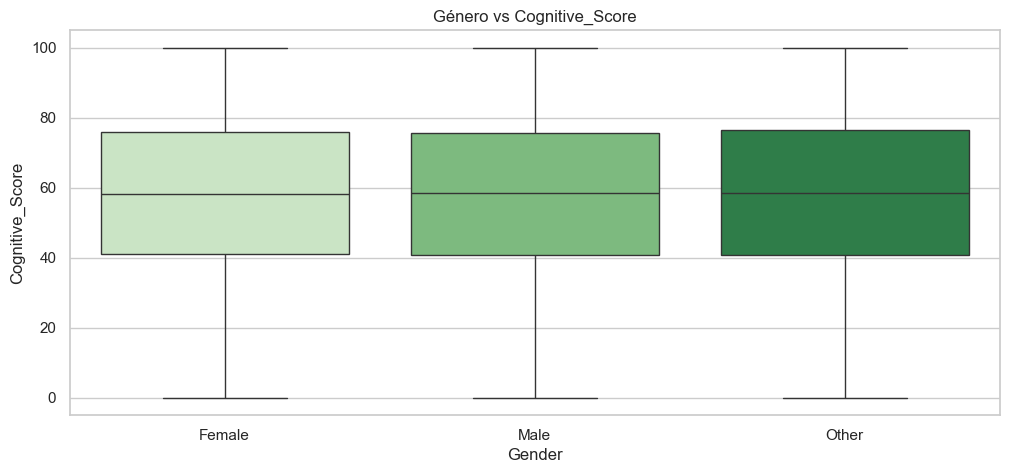

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset limpio
df = pd.read_csv("data/human_cognitive_performance_clean.csv")

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribución final de Cognitive Score
plt.figure(figsize=(10, 5))
sns.histplot(df['Cognitive_Score'], kde=True, bins=30, color='lightgreen')
plt.title("Distribución Final de Cognitive_Score")
plt.xlabel("Cognitive_Score")
plt.ylabel("Frecuencia")
plt.show()

# 2. Sleep_Duration vs Cognitive_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep_Duration', y='Cognitive_Score', alpha=0.5, color='mediumseagreen')
plt.title("Duración del Sueño vs Puntuación Cognitiva")
plt.xlabel("Horas de Sueño")
plt.ylabel("Cognitive_Score")
plt.grid(True)
plt.show()

# 3. Stress_Level vs Reaction_Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stress_Level', y='Reaction_Time', palette='Greens')
plt.title("Nivel de Estrés vs Tiempo de Reacción")
plt.xlabel("Stress_Level")
plt.ylabel("Reaction_Time")
plt.show()

# 4. Caffeine_Intake vs Cognitive_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Caffeine_Intake', y='Cognitive_Score', alpha=0.5, color='seagreen')
plt.title("Ingesta de Cafeína vs Cognitive_Score")
plt.xlabel("Caffeine_Intake (mg)")
plt.ylabel("Cognitive_Score")
plt.grid(True)
plt.show()

# 5. Age_Group vs Cognitive_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Cognitive_Score', palette='YlGn')
plt.title("Grupo Etario vs Cognitive_Score")
plt.xlabel("Grupo Etario")
plt.ylabel("Cognitive_Score")
plt.show()

# 6. Exercise_Frequency vs Cognitive_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exercise_Frequency', y='Cognitive_Score', palette='Greens')
plt.title("Frecuencia de Ejercicio vs Cognitive_Score")
plt.xlabel("Exercise_Frequency")
plt.ylabel("Cognitive_Score")
plt.show()

# 7. Comparación Real vs IA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cognitive_Score', y='AI_Predicted_Score', alpha=0.5, color='darkgreen')
plt.title("IA vs Puntuación Cognitiva Real")
plt.xlabel("Cognitive_Score (Real)")
plt.ylabel("AI_Predicted_Score")
plt.grid(True)
plt.show()

# 8. Mapa de Calor Correlación Final
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Correlación Final entre Variables Numéricas')
plt.show()

# 9. Distribución por Diet_Type y Gender
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Diet_Type', y='Cognitive_Score', palette='Greens')
plt.title("Tipo de Dieta vs Cognitive_Score")
plt.xlabel("Diet_Type")
plt.ylabel("Cognitive_Score")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Gender', y='Cognitive_Score', palette='Greens')
plt.title("Género vs Cognitive_Score")
plt.xlabel("Gender")
plt.ylabel("Cognitive_Score")
plt.show()


| Nº  | Gráfico                                              | ¿Qué muestra? | Interpretación                                                                                                                                                                |
| --- | ---------------------------------------------------- | ------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣ | **Distribución de `Cognitive_Score`**                | Histograma    | La puntuación cognitiva sigue una distribución relativamente normal, con concentración entre 40 y 80 puntos. Ideal para regresión.                                            |
| 2️⃣ | **`Sleep_Duration` vs `Cognitive_Score`**            | Dispersión    | Tendencia positiva: mayor duración de sueño suele estar asociada a mejor desempeño cognitivo. Hay dispersión.                                                                 |
| 3️⃣ | **`Stress_Level` vs `Reaction_Time`**                | Boxplot       | A mayor estrés, el tiempo de reacción tiende a ser más lento. Distribuciones amplias en niveles altos.                                                                        |
| 4️⃣ | **`Caffeine_Intake` vs `Cognitive_Score`**           | Dispersión    | No hay relación lineal clara. Algunos usuarios con alta cafeína presentan bajos y altos scores. Potencial efecto no lineal.                                                   |
| 5️⃣ | **`Age_Group` vs `Cognitive_Score`**                 | Boxplot       | Los grupos 20s a 40s tienen mejor rendimiento cognitivo promedio. Declina levemente a partir de los 50s.                                                                      |
| 6️⃣ | **`Exercise_Frequency` vs `Cognitive_Score`**        | Boxplot       | Tendencia clara: a mayor frecuencia de ejercicio, mayor `Cognitive_Score`. Consistente con literatura científica.                                                             |
| 7️⃣ | **`AI_Predicted_Score` vs `Cognitive_Score` (real)** | Dispersión    | Alta correlación visual. La IA predice bien, aunque no perfectamente. Ligero sesgo a subestimar en scores muy altos.                                                          |
| 8️⃣ | **Mapa de Calor – Correlaciones Finales**            | Heatmap       | Las mayores correlaciones positivas son entre `Memory_Test_Score`, `Cognitive_Score` y `AI_Predicted_Score`. `Stress_Level` y `Reaction_Time` se correlacionan negativamente. |
| 9️⃣ | **`Diet_Type` vs `Cognitive_Score`**                 | Boxplot       | Ligeramente superior en vegetarianos, aunque la diferencia es pequeña. Puede ser estadísticamente marginal.                                                                   |
| 🔟  | **`Gender` vs `Cognitive_Score`**                    | Boxplot       | Hombres y mujeres tienen rendimientos similares. Distribuciones casi idénticas.                                                                                               |


In [3]:
import pandas as pd

# Cargar dataset limpio
df = pd.read_csv("data/human_cognitive_performance_clean.csv")

# Obtener percentiles para filtrado
score_90 = df['Cognitive_Score'].quantile(0.90)
score_45 = df['Cognitive_Score'].quantile(0.45)
score_55 = df['Cognitive_Score'].quantile(0.55)

# Filtrar usuarios por rendimiento
top_users = df[df['Cognitive_Score'] >= score_90]
avg_users = df[(df['Cognitive_Score'] >= score_45) & (df['Cognitive_Score'] <= score_55)]

# Función para resumen de perfil
def perfil_usuario(df_group):
    return {
        'Edad promedio': round(df_group['Age'].mean(), 2),
        'Sueño promedio (h)': round(df_group['Sleep_Duration'].mean(), 2),
        'Estrés promedio': round(df_group['Stress_Level'].mean(), 2),
        'Cafeína promedio (mg)': round(df_group['Caffeine_Intake'].mean(), 2),
        'Tiempo frente a pantallas (h)': round(df_group['Daily_Screen_Time'].mean(), 2),
        'Tiempo de reacción promedio (ms)': round(df_group['Reaction_Time'].mean(), 2),
        'Frecuencia de ejercicio más común': df_group['Exercise_Frequency'].mode()[0],
        'Tipo de dieta más común': df_group['Diet_Type'].mode()[0],
        'Género más común': df_group['Gender'].mode()[0]
    }

# Obtener perfiles
perfil_top = perfil_usuario(top_users)
perfil_avg = perfil_usuario(avg_users)

# Mostrar perfiles
print("\n🧠 Perfil Cognitivo Ideal (Top 10%)")
for k, v in perfil_top.items():
    print(f"{k}: {v}")

print("\n👤 Usuario Promedio (Percentil 45–55)")
for k, v in perfil_avg.items():
    print(f"{k}: {v}")



🧠 Perfil Cognitivo Ideal (Top 10%)
Edad promedio: 38.26
Sueño promedio (h): 7.52
Estrés promedio: 4.15
Cafeína promedio (mg): 210.83
Tiempo frente a pantallas (h): 5.24
Tiempo de reacción promedio (ms): 253.41
Frecuencia de ejercicio más común: Medium
Tipo de dieta más común: Non-Vegetarian
Género más común: Female

👤 Usuario Promedio (Percentil 45–55)
Edad promedio: 38.46
Sueño promedio (h): 7.02
Estrés promedio: 5.49
Cafeína promedio (mg): 251.13
Tiempo frente a pantallas (h): 6.46
Tiempo de reacción promedio (ms): 399.59
Frecuencia de ejercicio más común: Low
Tipo de dieta más común: Non-Vegetarian
Género más común: Female


🧠 Perfil Cognitivo Ideal (Top 10%)
Este grupo representa el 10% de usuarios con mayor Cognitive_Score. Estas son sus características clave:

Edad promedio: 38.26 años
Muy similar a la media, lo que indica que la edad no es el principal diferenciador entre los más y menos capacitados cognitivamente.

Sueño promedio: 7.52 horas/día
Duermen casi media hora más que el usuario promedio. Este es un hallazgo importante: más sueño = mejor desempeño cognitivo.

Estrés promedio: 4.15
Notablemente más bajo que el promedio. El estrés bajo es consistentemente asociado a mejor memoria, atención y rapidez mental.

Cafeína promedio: 210.83 mg/día
Consumen menos cafeína que la media. Una ingesta moderada parece más beneficiosa que el exceso.

Tiempo frente a pantallas: 5.24 horas/día
Mucho más bajo que el promedio. Menos pantalla podría significar mejor higiene del sueño, menor distracción y más actividad física.

Tiempo de reacción promedio: 253.41 ms
Mucho más rápido (≈ 150 ms menos que el promedio). Esto refleja mayor agilidad mental y procesamiento eficiente.

Frecuencia de ejercicio más común: Medium
La mayoría se ejercita con una frecuencia moderada. Esto es consistente con estudios sobre ejercicio como potenciador cognitivo.

Tipo de dieta más común: Non-Vegetarian
No hay diferencia con el promedio aquí. La dieta no parece ser un factor diferenciador clave en este caso.

Género más común: Female
Ambos grupos tienen mayoría femenina, así que el género no parece influir decisivamente en esta muestra.

👤 Usuario Promedio (Percentil 45–55)
Este grupo representa a un usuario medio en términos de rendimiento cognitivo:

Edad promedio: 38.46 años
Igual que el grupo ideal.

Sueño: 7.02 h
Duermen menos, lo que puede impactar negativamente la concentración y la memoria.

Estrés: 5.49
Notablemente más alto. Se correlaciona con menor rendimiento mental.

Cafeína: 251.13 mg/día
Alta ingesta. Demasiada cafeína puede alterar el sueño y aumentar el estrés.

Pantallas: 6.46 h/día
Casi 1.2 horas más de exposición diaria. Puede afectar negativamente el descanso y el foco.

Tiempo de reacción: 399.59 ms
Más lento, lo que indica menor capacidad de procesamiento.

Ejercicio: Low
Hacen menos ejercicio, lo que puede impactar negativamente en el funcionamiento cerebral.

Dieta y género: igual al grupo top

🎯 Conclusión: ¿Qué diferencia al usuario cognitivamente ideal?
✔️ Más sueño
✔️ Menos estrés
✔️ Menos cafeína
✔️ Menos pantalla
✔️ Mejor tiempo de reacción
✔️ Ejercicio regular

Estos factores marcan una diferencia clara y medible en el rendimiento cognitivo, aún cuando edad, género y dieta no lo hagan.






